In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


dat = pd.read_csv("../data/etsy.csv")

In [2]:
dat.head()

,idListingURL,idOrig,idListing,idShop,list1_products_shopLink,list1_products_name_001_LP,list1_products_url_002_LP,list1_products_shopName_003_LP,list1_products_price_004_LP,list1_products_ads_005_LP,...,products_medianFeaturedItemsPrice_x11x,products_shopAnnouncementLength_x12x,products_numShopCategories_x13x,products_aboutTitleLength_x14x,products_aboutDescLength_x15x,products_shopPolicyWelcomeLength_x16x,products_paymentLength_x17x,products_shippingLength_x18x,products_refundAndExchangesLength_x19x,products_addPolicyFAQsLength_x20x
0,11024,13043,8430,296,https://www.etsy.com/shop/TheWoodenCorner?ref=...,Jewelry Rack and Shelf with Glass Jar,https://www.etsy.com/listing/240571507/jewelry...,TheWoodenCorner,48.0,notAd,...,193.0,NaN,20.0,11.0,153.0,11.0,NaN,NaN,NaN,NaN
1,3381,4004,2639,296,https://www.etsy.com/shop/TheWoodenCorner?ref=...,All-in-One Jewelry Rack - Wooden Wall Hanging ...,https://www.etsy.com/listing/222940654/all-in-...,TheWoodenCorner,132.0,notAd,...,193.0,NaN,20.0,11.0,153.0,11.0,NaN,NaN,NaN,NaN
2,511,607,416,296,https://www.etsy.com/shop/TheWoodenCorner?ref=...,Jewelry Organizer - Wooden Wall Hanging Jewelr...,https://www.etsy.com/listing/250564139/jewelry...,TheWoodenCorner,188.0,notAd,...,193.0,NaN,20.0,11.0,153.0,11.0,NaN,NaN,NaN,NaN
3,10625,12567,8430,296,https://www.etsy.com/shop/TheWoodenCorner?ref=...,Jewelry Rack and Shelf with Glass Jar,https://www.etsy.com/listing/240571507/jewelry...,TheWoodenCorner,48.0,notAd,...,193.0,NaN,20.0,11.0,153.0,11.0,NaN,NaN,NaN,NaN
4,10589,12521,8430,296,https://www.etsy.com/shop/TheWoodenCorner?ref=...,Jewelry Rack and Shelf with Glass Jar,https://www.etsy.com/listing/240571507/jewelry...,TheWoodenCorner,48.0,notAd,...,193.0,NaN,20.0,11.0,153.0,11.0,NaN,NaN,NaN,NaN


In [3]:
dat_analyze = dat[['idOrig',
'list1_products_name_001_LP',
'list1_products_price_004_LP',
'list1_products_aboutDesc_047_SP']]


dat_analyze.head()



,idOrig,list1_products_name_001_LP,list1_products_price_004_LP,list1_products_aboutDesc_047_SP
0,13043,Jewelry Rack and Shelf with Glass Jar,48.0,Display your beautiful jewelry in one convenie...
1,4004,All-in-One Jewelry Rack - Wooden Wall Hanging ...,132.0,Display your beautiful jewelry in one convenie...
2,607,Jewelry Organizer - Wooden Wall Hanging Jewelr...,188.0,Display your beautiful jewelry in one convenie...
3,12567,Jewelry Rack and Shelf with Glass Jar,48.0,Display your beautiful jewelry in one convenie...
4,12521,Jewelry Rack and Shelf with Glass Jar,48.0,Display your beautiful jewelry in one convenie...


In [4]:
dat_analyze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11919 entries, 0 to 11918
Data columns (total 4 columns):
idOrig                             11919 non-null int64
list1_products_name_001_LP         11919 non-null object
list1_products_price_004_LP        11898 non-null float64
list1_products_aboutDesc_047_SP    9757 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 372.5+ KB


In [5]:
dat_analyze.isnull().sum()

idOrig                                0
list1_products_name_001_LP            0
list1_products_price_004_LP          21
list1_products_aboutDesc_047_SP    2162
dtype: int64

In [6]:
dat_analyze.shape

(11919, 4)

In [7]:
dat_analyze = dat_analyze.drop_duplicates(['list1_products_aboutDesc_047_SP'])

In [8]:
dat_analyze.shape

(2855, 4)

In [9]:
dat_analyze.isnull().sum()

idOrig                              0
list1_products_name_001_LP          0
list1_products_price_004_LP        11
list1_products_aboutDesc_047_SP     1
dtype: int64

In [10]:
dat_analyze = dat_analyze.dropna()

In [11]:
dat_analyze.shape

(2843, 4)

In [12]:
dat_analyze.isnull().sum()

idOrig                             0
list1_products_name_001_LP         0
list1_products_price_004_LP        0
list1_products_aboutDesc_047_SP    0
dtype: int64

In [13]:
dat_analyze['desc_length'] = dat_analyze['list1_products_aboutDesc_047_SP'].apply(len)

dat_analyze.head()

,idOrig,list1_products_name_001_LP,list1_products_price_004_LP,list1_products_aboutDesc_047_SP,desc_length
0,13043,Jewelry Rack and Shelf with Glass Jar,48.0,Display your beautiful jewelry in one convenie...,866
7,12175,Women's Sterling Silver Ganesha Earrings - Jew...,26.0,namaste and welcome to the 5th element yoga et...,2704
9,9245,"Dog Lover Necklace, Pet Jewelry, Dog Paw, Pet ...",28.0,I love to create jewelry that celebrates life ...,491
11,12202,Real Butterfly Jewelry - Blue Morpho Butterfly...,42.0,I worked on a large farm that grew flowers for...,2142
14,2026,Hand Stamped/Remembrance Jewelry/In Memory Of/...,15.0,I started my shop after local friends told me ...,285


In [14]:
import statsmodels.stats.api as sms
ci95 = sms.CompareMeans(sms.DescrStatsW(dat_analyze.list1_products_price_004_LP), sms.DescrStatsW(dat_analyze.desc_length))
ci95.tconfint_diff(usevar='unequal')

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(-1105.9330831723087, -1048.7618658252291)

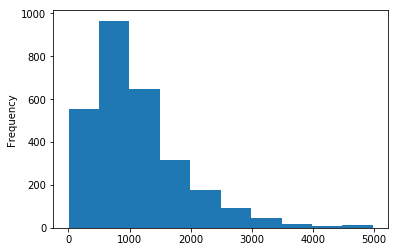

In [15]:
x = dat_analyze.desc_length

x.plot(kind = 'hist')

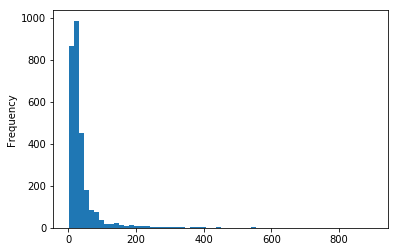

In [16]:
y = dat_analyze.list1_products_price_004_LP
y.plot(kind='hist', bins=60)

In [17]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
model = smf.ols(formula='dat_analyze.list1_products_price_004_LP ~ dat_analyze.desc_length', data=dat_analyze)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                      
===================================================================================================
Dep. Variable:     dat_analyze.list1_products_price_004_LP   R-squared:                       0.008
Model:                                                 OLS   Adj. R-squared:                  0.007
Method:                                      Least Squares   F-statistic:                     21.91
Date:                                     Fri, 07 Sep 2018   Prob (F-statistic):           3.00e-06
Time:                                             17:55:34   Log-Likelihood:                -15964.
No. Observations:                                     2843   AIC:                         3.193e+04
Df Residuals:                                         2841   BIC:                         3.194e+04
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  31.0507      2.188     14.194      0.000      26.761      35.340
dat_analyze.desc_length     0.0075      0.002      4.680      0.000       0.004       0.011
==============================================================================
Omnibus:                     3535.084   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           469872.486
Skew:                           6.744   Prob(JB):                         0.00
Kurtosis:                      64.519   Cond. No.                     2.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
dat_analyze['list1_products_price_004_LP'].mean()

39.465047485051002

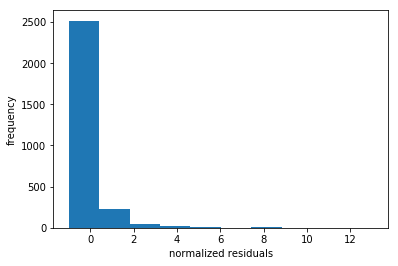

In [19]:
resid = fitted.resid_pearson
plt.hist(resid)
plt.ylabel('frequency')
plt.xlabel('normalized residuals')

In [20]:

import statsmodels.api as sm
plot = sm.qqplot(resid, stats.t, distargs=(4,), loc=0, scale=1, line='45')
plt.ylabel('normalized residuals')
plt.xlabel('normal scores')
plt.show(plot)

NameError: name 'stats' is not defined

In [ ]:
dat_analyze['centered'] = dat_analyze.desc_length - dat_analyze.desc_length.mean() # to shift the location of distribution

model = smf.ols(formula='dat_analyze.list1_products_price_004_LP ~ dat_analyze.centered', data=dat_analyze)
fitted = model.fit()
fitted.summary()

In [ ]:
dat_analyze.desc_length.mean()

# We found that on average, product description has 1116 characters and these listings have an average price of dollars 39.46. Also for every increase in length of character, the listing price increases by 0.0075 dollars!




In [ ]:
dat_analyze.head()

In [ ]:
dat.head()

In [27]:
dat.filter(like='Pic', axis = 1) # axis 1 represents columns as opposed to rows. 

,list1_products_numPics_022_DPA,products_numPics_x1x
0,\r\r\n ...,5.0
1,\r\r\n ...,4.0
2,\r\r\n ...,4.0
3,\r\r\n ...,5.0
4,\r\r\n ...,5.0
5,\r\r\n ...,5.0
6,\r\r\n ...,5.0
7,\r\r\n ...,3.0
8,\r\r\n ...,4.0
9,\r\r\n ...,4.0


In [28]:
dat_analyze.head()

,idOrig,list1_products_name_001_LP,list1_products_price_004_LP,list1_products_aboutDesc_047_SP,desc_length
0,13043,Jewelry Rack and Shelf with Glass Jar,48.0,Display your beautiful jewelry in one convenie...,866
7,12175,Women's Sterling Silver Ganesha Earrings - Jew...,26.0,namaste and welcome to the 5th element yoga et...,2704
9,9245,"Dog Lover Necklace, Pet Jewelry, Dog Paw, Pet ...",28.0,I love to create jewelry that celebrates life ...,491
11,12202,Real Butterfly Jewelry - Blue Morpho Butterfly...,42.0,I worked on a large farm that grew flowers for...,2142
14,2026,Hand Stamped/Remembrance Jewelry/In Memory Of/...,15.0,I started my shop after local friends told me ...,285


In [29]:
dat_analyze.shape

(2843, 5)

In [32]:
dat2_analyze= pd.merge(dat_analyze, dat[['idOrig', 'products_numPics_x1x']],  on='idOrig')

In [33]:
dat2_analyze.head()

,idOrig,list1_products_name_001_LP,list1_products_price_004_LP,list1_products_aboutDesc_047_SP,desc_length,products_numPics_x1x
0,13043,Jewelry Rack and Shelf with Glass Jar,48.0,Display your beautiful jewelry in one convenie...,866,5.0
1,12175,Women's Sterling Silver Ganesha Earrings - Jew...,26.0,namaste and welcome to the 5th element yoga et...,2704,3.0
2,9245,"Dog Lover Necklace, Pet Jewelry, Dog Paw, Pet ...",28.0,I love to create jewelry that celebrates life ...,491,4.0
3,12202,Real Butterfly Jewelry - Blue Morpho Butterfly...,42.0,I worked on a large farm that grew flowers for...,2142,5.0
4,2026,Hand Stamped/Remembrance Jewelry/In Memory Of/...,15.0,I started my shop after local friends told me ...,285,3.0


In [34]:
model = smf.ols(formula='list1_products_price_004_LP ~ desc_length + products_numPics_x1x', data=dat2_analyze)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     list1_products_price_004_LP   R-squared:                       0.014
Model:                                     OLS   Adj. R-squared:                  0.013
Method:                          Least Squares   F-statistic:                     19.26
Date:                         Fri, 07 Sep 2018   Prob (F-statistic):           4.94e-09
Time:                                 18:04:51   Log-Likelihood:                -15212.
No. Observations:                         2702   AIC:                         3.043e+04
Df Residuals:                             2699   BIC:                         3.045e+04
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                8.9840      5.873      1.530      0.126      -2.533      20.501
desc_length              0.0069      0.002      4.042      0.000       0.004       0.010
products_numPics_x1x     5.4856      1.314      4.176      0.000       2.910       8.062
==============================================================================
Omnibus:                     3349.926   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           431706.640
Skew:                           6.711   Prob(JB):                         0.00
Kurtosis:                      63.451   Cond. No.                     6.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
dat2_analyze['desc_length_centered'] = dat2_analyze.desc_length - dat2_analyze.desc_length.mean()
dat2_analyze['products_numPics_x1x_centered'] = dat2_analyze.products_numPics_x1x - dat2_analyze.products_numPics_x1x.mean()

In [39]:
dat2_analyze.head()

,idOrig,list1_products_name_001_LP,list1_products_price_004_LP,list1_products_aboutDesc_047_SP,desc_length,products_numPics_x1x,desc_length_centered,products_numPics_x1x_centered
0,13043,Jewelry Rack and Shelf with Glass Jar,48.0,Display your beautiful jewelry in one convenie...,866,5.0,-250.812522,0.702813
1,12175,Women's Sterling Silver Ganesha Earrings - Jew...,26.0,namaste and welcome to the 5th element yoga et...,2704,3.0,1587.187478,-1.297187
2,9245,"Dog Lover Necklace, Pet Jewelry, Dog Paw, Pet ...",28.0,I love to create jewelry that celebrates life ...,491,4.0,-625.812522,-0.297187
3,12202,Real Butterfly Jewelry - Blue Morpho Butterfly...,42.0,I worked on a large farm that grew flowers for...,2142,5.0,1025.187478,0.702813
4,2026,Hand Stamped/Remembrance Jewelry/In Memory Of/...,15.0,I started my shop after local friends told me ...,285,3.0,-831.812522,-1.297187


In [53]:
model = smf.ols(formula='list1_products_price_004_LP ~ (desc_length_centered + products_numPics_x1x_centered) ', data=dat2_analyze)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     list1_products_price_004_LP   R-squared:                       0.014
Model:                                     OLS   Adj. R-squared:                  0.013
Method:                          Least Squares   F-statistic:                     19.26
Date:                         Fri, 07 Sep 2018   Prob (F-statistic):           4.94e-09
Time:                                 18:56:12   Log-Likelihood:                -15212.
No. Observations:                         2702   AIC:                         3.043e+04
Df Residuals:                             2699   BIC:                         3.045e+04
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        40.2208      1.298     30.988      0.000      37.676      42.766
desc_length_centered              0.0069      0.002      4.042      0.000       0.004       0.010
products_numPics_x1x_centered     5.4856      1.314      4.176      0.000       2.910       8.062
==============================================================================
Omnibus:                     3349.926   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           431706.640
Skew:                           6.711   Prob(JB):                         0.00
Kurtosis:                      63.451   Cond. No.                         780.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

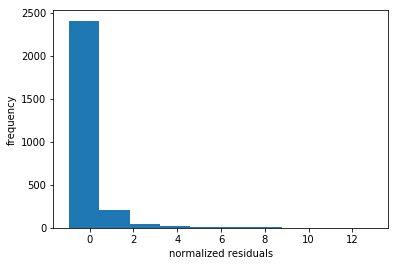

In [41]:
resid = fitted.resid_pearson
plt.hist(resid)
plt.ylabel('frequency')
plt.xlabel('normalized residuals')

In [49]:
dat2_analyze.shape

(2843, 8)

In [51]:
dat2_analyze.isnull().sum()

idOrig                               0
list1_products_name_001_LP           0
list1_products_price_004_LP          0
list1_products_aboutDesc_047_SP      0
desc_length                          0
products_numPics_x1x               141
desc_length_centered                 0
products_numPics_x1x_centered      141
dtype: int64

In [ ]:
dat2_analyze.products_numPics_x1x.mean()

In [55]:
dat2_analyze.products_numPics_x1x.mean()

4.2971872686898598

In [ ]:
dat2_analyze.desc_length.mean()

In [56]:
# interaction variable is used to find out whether some items have more pictures and less descriptions, and vice versa

dat2_analyze['interaction'] = dat2_analyze.desc_length_centered * dat2_analyze.products_numPics_x1x_centered

dat2_analyze['interaction'][:5]

0    -176.274234
1   -2058.879390
2     185.983514
3     720.514812
4    1079.016613
Name: interaction, dtype: float64

In [57]:
model = smf.ols(formula='list1_products_price_004_LP ~ (desc_length_centered + products_numPics_x1x_centered + interaction) ', data=dat2_analyze)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     list1_products_price_004_LP   R-squared:                       0.015
Model:                                     OLS   Adj. R-squared:                  0.014
Method:                          Least Squares   F-statistic:                     14.15
Date:                         Fri, 07 Sep 2018   Prob (F-statistic):           3.79e-09
Time:                                 19:14:44   Log-Likelihood:                -15210.
No. Observations:                         2702   AIC:                         3.043e+04
Df Residuals:                             2698   BIC:                         3.045e+04
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        39.8719      1.309     30.453      0.000      37.305      42.439
desc_length_centered              0.0063      0.002      3.629      0.000       0.003       0.010
products_numPics_x1x_centered     5.8944      1.329      4.434      0.000       3.288       8.501
interaction                       0.0037      0.002      1.967      0.049    1.24e-05       0.007
==============================================================================
Omnibus:                     3347.747   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           430377.392
Skew:                           6.704   Prob(JB):                         0.00
Kurtosis:                      63.357   Cond. No.                         831.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""